<a href="https://colab.research.google.com/github/teegwende/WQPandEntitiesDensity/blob/main/genergraphEval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
from pandas import read_csv, DataFrame
import pandas as pd

# df = read_csv('/gdrive/MyDrive/traitement_ordinaire/datarep/predictions.csv', index_col='periode', parse_dates=True)
df = read_csv('/gdrive/MyDrive/traitement_ordinaire/datarep/predictionsExtin.csv', index_col='periode', parse_dates=True)

In [3]:
#Distribution des masses
for t,ph in zip(df['TEMP'],df['PH']):
  if (t<18 or t>32) or (ph<4 or ph>10):
    print("letal")
    noninfeste=1
    infeste=0
    omega=1-noninfeste
  elif (t>=25 and t<=28) or (ph>=6.5 and ph<=8.2):
    # print("optimale")
    noninfeste=0
    infeste=70.43/100.0
    omega=1-infeste
  else:
    print("Favorable")
    noninfeste=0
    infeste=29.57/100.0
    omega=1-infeste
      
  listemasses1={'A':round(infeste,3),'B':round(noninfeste,3),'A_B':round(omega,3)}


print("infeste",infeste)
print("noninfeste",noninfeste)
print("omega",omega)

r0=2

if (r0>1):
  noninfeste2=0
  infeste2=85.22/100.0
  omega2=1-infeste

if (r0<1):
  noninfeste2=0
  infeste2=2.27/100.0
  omega2=1-infeste

if (r0==1):
  noninfeste2=0
  infeste2=0
  omega2=1-infeste

listemasses2={'A':round(infeste2,3),'B':round(noninfeste2,3),'A_B':round(omega2,3)}

infeste 0.7043
noninfeste 0
omega 0.29569999999999996


In [14]:
#Combinaison
def Combinaison(listemasses1,listemasses2):

  import pandas as pd
  matricefusion=[]
  calcinter=[]
  lescolonnes=[]
  leslignes=[]
  listefusion={}
  sumA=0
  sumB=0
  sumAB=0
  i=1
#BLOC d'instructions pour faire le produit des masses
  for etat1, m1 in listemasses1.items():
    calcinter=[]
    if etat1=='A':
      for etat2,m2 in listemasses2.items():
        calcinter.append(round(m1*m2,3))
        if (etat2=='A' or etat2=='A_B'):
          sumA+=m1*m2

    if etat1=='B':
      for etat2,m2 in listemasses2.items():
        calcinter.append(round(m1*m2,3))
        if (etat2=='B' or etat2=='A_B'):
          sumB+=m1*m2

    if etat1=='A_B':
      for etat2,m2 in listemasses2.items():
        calcinter.append(round(m1*m2,3))
        if etat2=='A':
          sumA+=m1*m2
        if etat2=='B':
          sumB+=m1*m2
        if etat2=='A_B':
          sumAB+=m1*m2

    matricefusion.append(calcinter)

#BLOC d'instructions pour former les lignes et les colonnes du dataframe
  for etat1, m1 in listemasses1.items():
    nomcol=etat1+" ("+str(m1)+")"
    lescolonnes.append(nomcol)

  for etat2, m2 in listemasses2.items():
    nomligne=etat2+' ('+str(m2)+')'
    leslignes.append(nomligne)


  df = pd.DataFrame(matricefusion)
  df.columns=lescolonnes
  df.index=leslignes

  print(df)

Combinaison(listemasses1,listemasses2)

sumA 1.060384
sumB 0.0
sumAB 0.08761599999999999
[0.6, 0.0, 0.208]
[0.0, 0, 0.0]
[0.252, 0.0, 0.088]
             A (0.704)  B (0)  A_B (0.296)
A (0.852)        0.600    0.0        0.208
B (0)            0.000    0.0        0.000
A_B (0.296)      0.252    0.0        0.088


In [4]:
#Affaiblissement
alpha1=0
alpha2=0

def affaiblissement(m1,m2,omega,alpha):
  m1_aff=(1-alpha)*m1
  m2_aff=(1-alpha)*m2
  omega_aff=(1-alpha)*omega+alpha
  return m1_aff,m2_aff,omega_aff

print(affaiblissement(infeste2,noninfeste2,omega2,0.1))


(0.76698, 0.0, 0.36612999999999996)


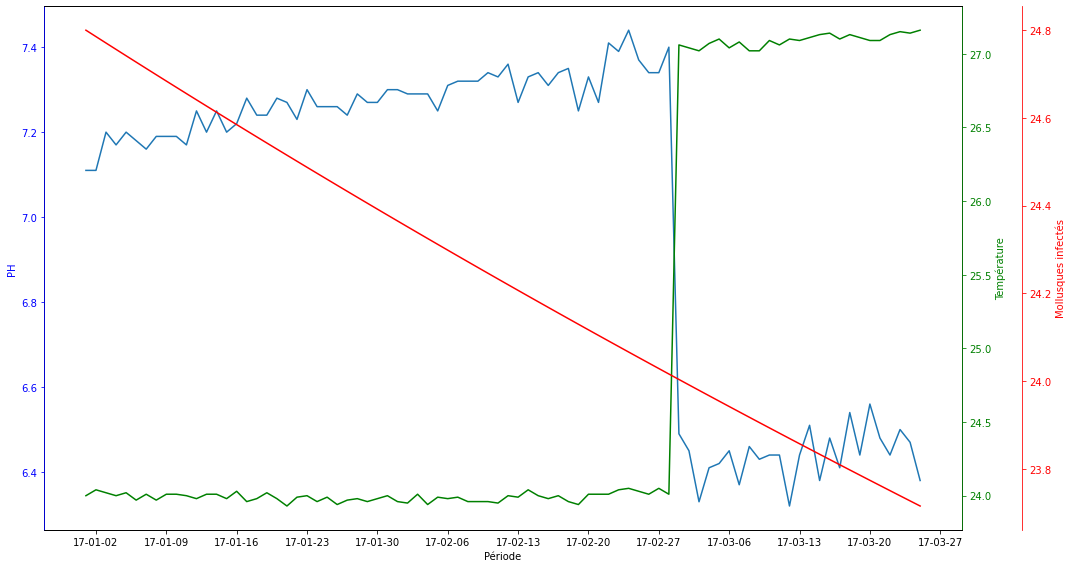

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.plot(df.index,df['PH'])
ax1.set_ylabel('PH', color='blue')
ax1.set_xlabel("Période")
ax1.tick_params(axis='y',colors='blue')

ax2=ax1.twinx()
ax2.plot(df.index,df['TEMP'], color='green')
ax2.set_ylabel('Température', color='green')
ax2.tick_params(axis='y',colors='green')

entiteax3="Mollusques infectés"
ax3=ax1.twinx()
ax3.plot(df.index,df[entiteax3], color='red')
ax3.spines['right'].set_position(('outward',60))

ax3.set_ylabel(entiteax3, color='red')

ax3.tick_params(axis='y',colors='red')
ax3.xaxis.set_major_formatter(DateFormatter("%y-%m-%d"))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=7))

plt.xticks(rotation=45, ha='right',fontsize=14)
# ax4=ax1.twinx()
# ax4.plot(df.index,df['Mollusques infectés'], color='yellow')
# ax4.spines['left'].set_position(('outward',60))
# ax4.set_ylabel('Mollusques infectés', color='yellow')
# ax4.tick_params(axis='y',colors='yellow')

ax2.spines['right'].set_color('green')
ax3.spines['right'].set_color('red')
ax3.spines['left'].set_color('blue')

fig.tight_layout() # Pour la prise de l'axe décalée dans la génération réelle du graphe
plt.savefig("/gdrive/MyDrive/traitement_ordinaire/datarep/eaunonInfeste.pdf")
plt.show()